In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as pgo
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [14]:
data = pd.read_csv('C:/Users/tansi/OneDrive/Desktop/my acess/Thecleverprogrammer.csv')
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [15]:
data["Date"] = pd.to_datetime(data["Date"], 
                             format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


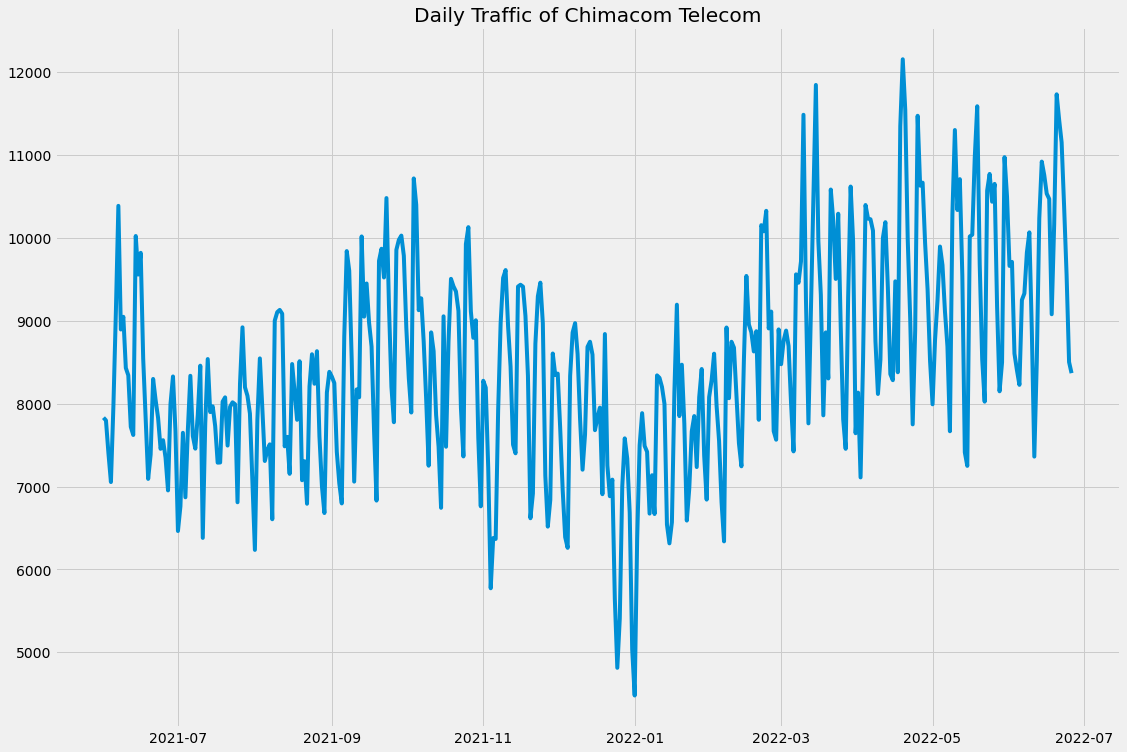

In [16]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(17, 12))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Chimacom Telecom")
plt.show()

<Figure size 432x288 with 0 Axes>

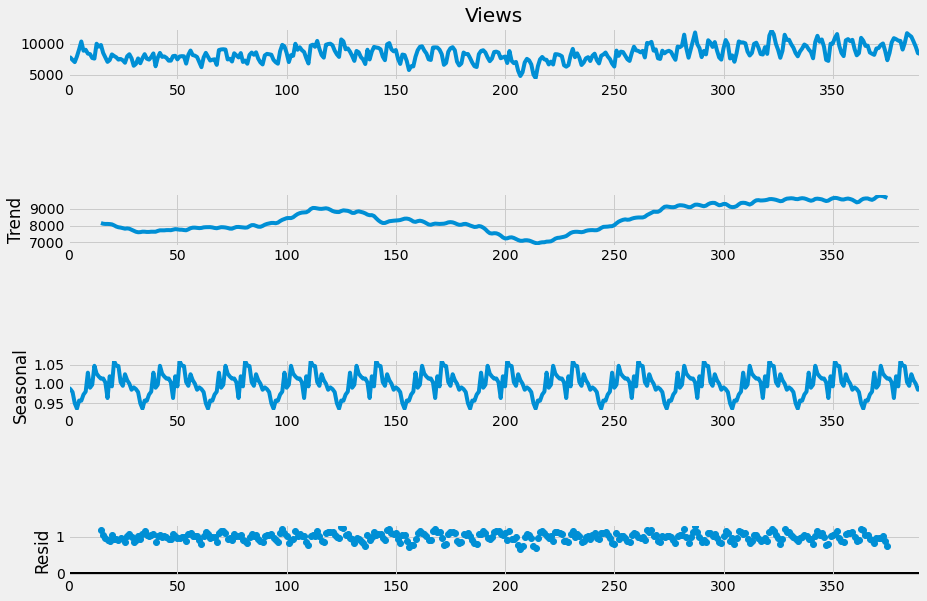

In [17]:
result = seasonal_decompose(data["Views"], model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)


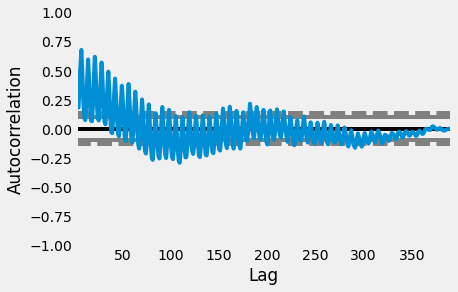

In [18]:
pd.plotting.autocorrelation_plot(data["Views"])

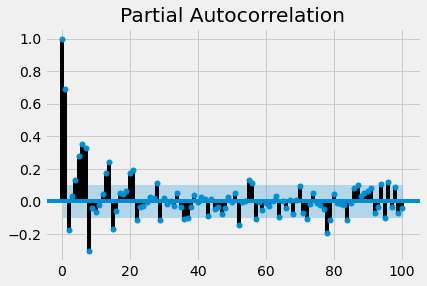

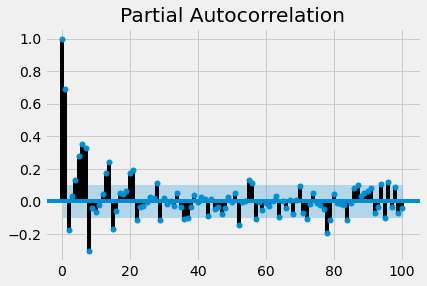

In [19]:
plot_pacf(data["Views"], lags = 100)

In [20]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'], 
                                order=(p, d, q), 
                                seasonal_order=(p, d, q, 12))
mmodel=model.fit()
model=model.fit()
print(model.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.348
Date:                            Sat, 17 Feb 2024   AIC                           6228.695
Time:                                    20:23:12   BIC                           6287.719
Sample:                                         0   HQIC                          6252.121
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7429      0.129      5.747      0.000       0.490       0.996
ar.L2         -0.7818      0.133   

In [27]:
predictions = model.predict(len(data), len(data)+30)
print(predictions)

391     9845.452750
392    10830.050613
393    10753.436451
394     9810.230257
395     8801.927610
396     8312.801666
397     8933.672453
398     9717.507567
399    10309.028544
400    10595.929023
401     9855.643332
402     9301.544296
403     8979.622557
404     9052.650549
405    10463.037126
406    10950.432796
407    10862.767934
408    10077.081563
409     9430.034570
410     8610.554216
411     9135.293579
412    10319.057791
413    10626.338553
414    10768.064931
415    10207.983162
416     9441.113072
417     8985.848469
418     9106.227538
419     9914.999554
420    10300.867702
421    10714.865576
dtype: float64


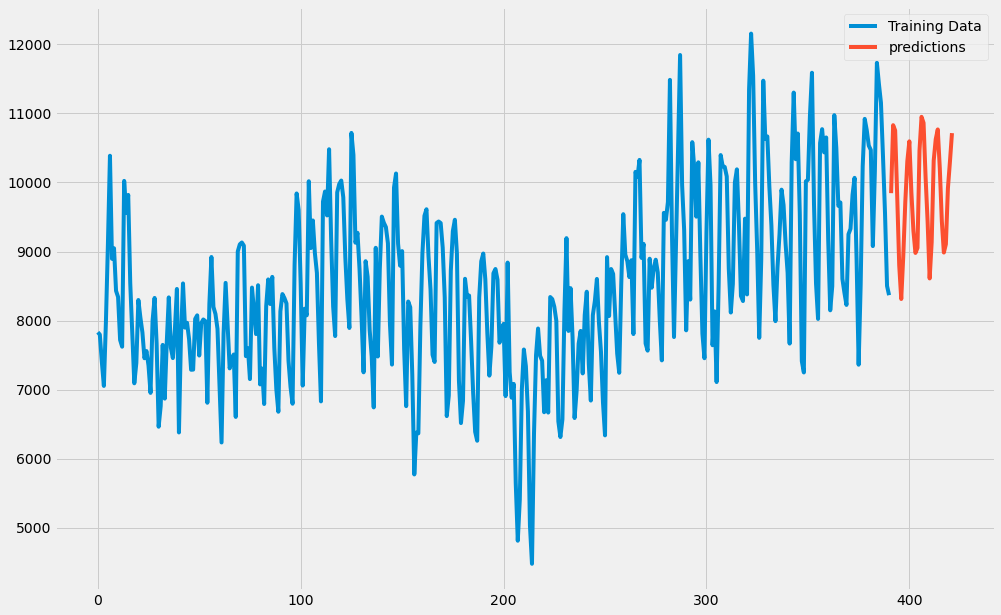

In [28]:
data['Views'].plot(legend=True, label= "Training Data", figsize=(15,10))

predictions.plot(legend=True, label="predictions")